
## INSTALLATION


In [1]:
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-rmua8q1o
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-rmua8q1o
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 831cdc10906a23aabe4591a4be06f4c989e4ee30
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-lw7_89ve/groundingdino_da0e208d71ec4a94b71d9db9e93b950e
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-lw7_89ve/groundingdino_da0e208d71ec4a94b71d9db9e93b950e
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit df5b48a3efbaa64288d8d0ad09b748ac86f22671
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [1]:
!pip install diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.16.4
    Uninstalling huggingface-hub-0.16.4:
      Successfully uninstalled huggingface-hub-0.16.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lang-sam 0.1.0 requires huggingface-hub<0.17.0,>=0.16.4, but you have huggingface-hub 0.23.4 which is incompatible.


In [2]:
from PIL import Image
from lang_sam import LangSAM
from lang_sam.utils import draw_image
from diffusers import StableDiffusionInpaintPipeline

import torch
import numpy as np

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/pytho

In [3]:
# Check and set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Initializing **LangSAM** 

In [4]:
model = LangSAM()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:19<00:00, 129MB/s]


### Initializing **StableDiffusionInpaintPipeline** 

In [5]:
inpaint = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)

inpaint.to(device)

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.29.1",
  "_name_or_path": "stabilityai/stable-diffusion-2-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Pipeline


In [18]:
# Function to process image, perform segmentation, and inpainting

def final_pipeline(image_pil, Source_prompt, Target_prompt):

    # Step 1: LangSAM predict
    masks, boxes, labels, logits = model.predict(image_pil, Source_prompt)

    # Step 2: Convert image_pil to numpy array
    image_array = np.array(image_pil)

    # Step 3: Draw masks on the image
    image_with_masks = draw_image(image_array, masks, boxes, labels)

    # Step 4: Convert masks to numpy arrays
    masks_np = [mask.squeeze().detach().cpu().numpy() for mask in masks]

    # Step 5: Select mask based on label provided by Source_prompt
    selected_label = Source_prompt.lower()  # Convert to lower case for case insensitivity
    mask_image_np = None

    for mask, label in zip(masks_np, labels):
        if label.lower() == selected_label:
            mask_image_np = mask
            break

    if mask_image_np is None:
        raise ValueError(f"No mask found for label '{Source_prompt}'")

    # Step 6: Convert mask to PIL Image
    mask_image_pil = Image.fromarray(mask_image_np)

    # Step 7: Perform inpainting with StableDiffusionInpaintPipeline
    inpainted_image = inpaint(prompt=Target_prompt, image=image_pil, mask_image=mask_image_pil).images[0]

    return inpainted_image

In [72]:
image_pil = Image.open('/content/Screenshot 2024-06-25 114812.png').convert("RGB").resize((1064, 1064))
Source_prompt = 'House'
Target_prompt = "middle-age Castle"

# Call final_Pipeline function
result_image = final_pipeline(image_pil, Source_prompt, Target_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

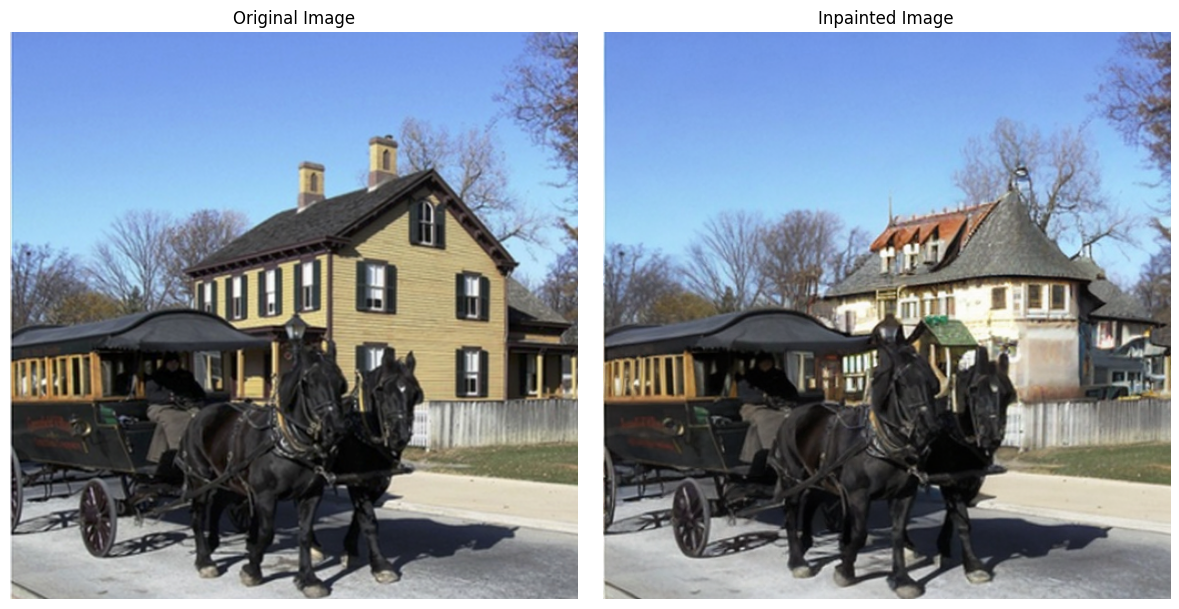

In [73]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original image with masks
axes[0].imshow(image_pil)
axes[0].set_title('Original Image')

# Plot inpainted image
axes[1].imshow(result_image)
axes[1].set_title('Inpainted Image')

# Hide axes ticks for cleaner visualization
for ax in axes:
    ax.axis('off')

# Adjust layout and display images
plt.tight_layout()
plt.show()

In [109]:
image_pil = Image.open('/content/Car.jpg').convert("RGB").resize((1064, 1064))
Source_prompt = 'Car'
Target_prompt = 'Race Car'

# Call final_Pipeline function
result_image = final_pipeline(image_pil, Source_prompt, Target_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

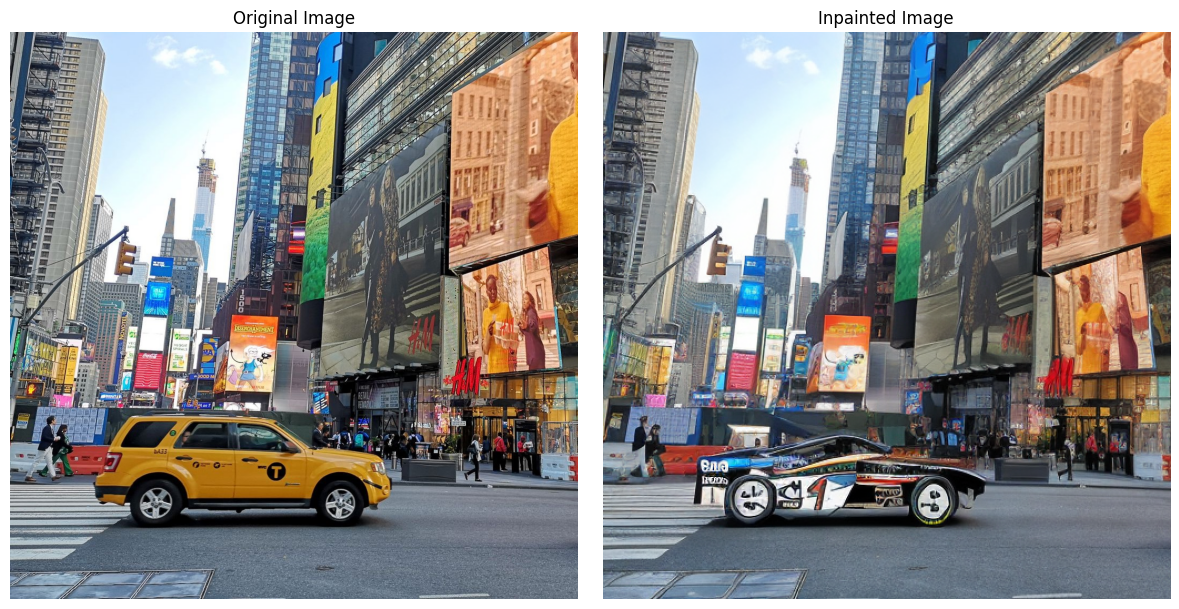

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot original image with masks
axes[0].imshow(image_pil)
axes[0].set_title('Original Image')

# Plot inpainted image
axes[1].imshow(result_image)
axes[1].set_title('Inpainted Image')

# Hide axes ticks for cleaner visualization
for ax in axes:
    ax.axis('off')

# Adjust layout and display images
plt.tight_layout()
plt.show()